# Hypothesis Testing Exercise on Cutlets Data

**Problem Statement -** A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

#### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
df = pd.read_csv('Cutlets.csv')
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
#renaming the label names to remove empty spaces
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', ''))
df.columns = cols

#### EDA on dataset

In [4]:
# Check first 5 records
df.head(5)

,UnitA,UnitB
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
# Check last 5 records
df.tail(5)

,UnitA,UnitB
30,6.7794,7.0992
31,7.2783,7.1180
32,7.1561,6.6965
33,7.3943,6.5780
34,6.9405,7.3875


In [6]:
# Check for data types, non-null values & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UnitA   35 non-null     float64
 1   UnitB   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [7]:
# Get central tendency, dispersion and shape of dataset’s distribution
df.describe()

,UnitA,UnitB
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [8]:
# Checking Null values
df.isna().sum()

UnitA    0
UnitB    0
dtype: int64

In [9]:
# Check the dimensions of the DataFrame
df.shape

(35, 2)

In [10]:
# Check for the random sample from the DataFrame
df.sample(5)

,UnitA,UnitB
33,7.3943,6.5780
20,6.9438,6.8889
13,6.9256,6.0380
25,6.8568,6.9399
8,6.6840,7.2402


#### Visualize data

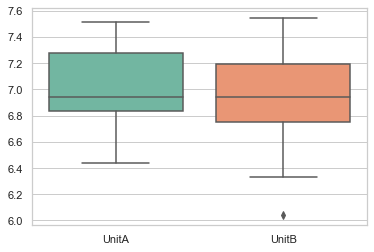

In [11]:
sns.set(style="whitegrid")
ax = sns.boxplot(data = df, orient = "v", palette = "Set2")

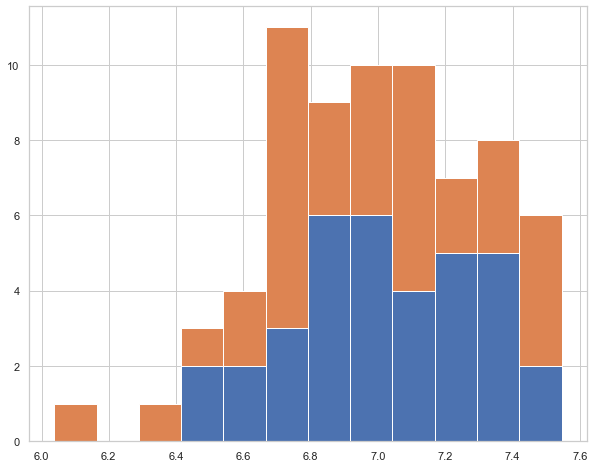

In [12]:
# Stacked histogram
fig, axs = plt.subplots(1, figsize = (10, 8))
plt1 = plt.hist([df.UnitA, df.UnitB], bins = int(180/15), stacked = True)
plt.show()

In [13]:
from scipy.stats import shapiro

Consider significance level i.e. $\alpha$ as 5%. <br>
**Null hypothesis (H0)** - There is no statistical significance between the two variables. <br>
**Alternate Hypothesis (H1)** - There is a statistically significant relationship between two variables.

In [14]:
shapiro(df.UnitA)

ShapiroResult(statistic=0.9649458527565002, pvalue=0.3199819028377533)

P value for Unit A is 0.32 which is greater than 0.05 i.e. $\alpha$.

In [15]:
shapiro(df.UnitB)

ShapiroResult(statistic=0.9727300405502319, pvalue=0.5224985480308533)

P value for Unit A is 0.52 which is greater than 0.05 i.e. $\alpha$.

Hence, H0 is accepted. Thus, data is normally distributed.

To find whether difference between the mean of two units is significan or not, we will perform t-paired test.

In [16]:
from scipy.stats import ttest_ind as tti

In [17]:
tti(df['UnitA'], df['UnitB'])

Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)

As p value 0.47 is greater than 0.05 i.e. $\alpha$, H0 is accepted.